<a href="https://colab.research.google.com/github/rklepov/hse-cs-ml-2018-2019/blob/master/10-CV/01-intro/001-medianfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Медианный фильтр

In [0]:
import cv2
import numpy as np

In [0]:
img = cv2.imread('./lena.png')

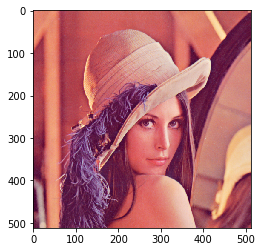

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])

In [0]:
img.shape

(512, 512, 3)

In [0]:
def median_filter(img, ksize):
    result = np.zeros_like(img)
    for channel in range(img.shape[-1]):
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                result[x, y, channel] = img[x, y, channel]
                # TODO: вычислить медиану в окрестности х, y для окна размера ksize
                ksize2 = ksize // 2
                window = img[
                    max(0, x-ksize2):min(x+ksize2+1, img.shape[0]),
                    max(0, y-ksize2):min(y+ksize2+1, img.shape[1]),
                    channel
                ]
                result[x, y, channel] = np.median(window)
    return result

In [0]:
# def median_filter(img, ksize):
#     return cv2.medianBlur(img, ksize)

## Добавляем случайный шум на изображение

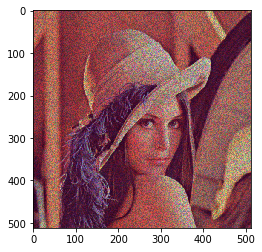

In [0]:
noisy_img = img.astype(float) + np.random.uniform(img.astype(float))
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img[...,::-1])

In [0]:
from ipywidgets import interact

def median_filter_show(ksize = 5):
    filtered = median_filter(noisy_img, ksize)
    return plt.imshow(filtered[...,::-1]);

interact(median_filter_show, ksize = (1, 20, 1));

interactive(children=(IntSlider(value=5, description='ksize', max=20, min=1), Output()), _dom_classes=('widget…